# Machine Learning: Capestone II

In [3]:
import pandas
import numpy
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import missingno
%matplotlib inline

## Reading the data

In [2]:
# Reading the data
arrests = pandas.read_csv("UsArrests.csv")
arrests.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## Data Exploration

In [4]:
# Searching for null values in the dataframe
arrests.isna().sum()

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [10]:
# Assigning the column names to "features" variable
features = arrests.columns
features

Index(['City', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

#### Identifying null and/or empty values

In [25]:
arrests.loc[arrests["City"] == " "]

,City,Murder,Assault,UrbanPop,Rape


In [18]:
arrests.loc[arrests["Murder"] == " "]

,City,Murder,Assault,UrbanPop,Rape


In [19]:
arrests.loc[arrests["Assault"] == " "]

,City,Murder,Assault,UrbanPop,Rape


In [20]:
arrests.loc[arrests["UrbanPop"] == " "]

,City,Murder,Assault,UrbanPop,Rape


In [21]:
arrests.loc[arrests["Rape"] == " "]

,City,Murder,Assault,UrbanPop,Rape


<AxesSubplot:>

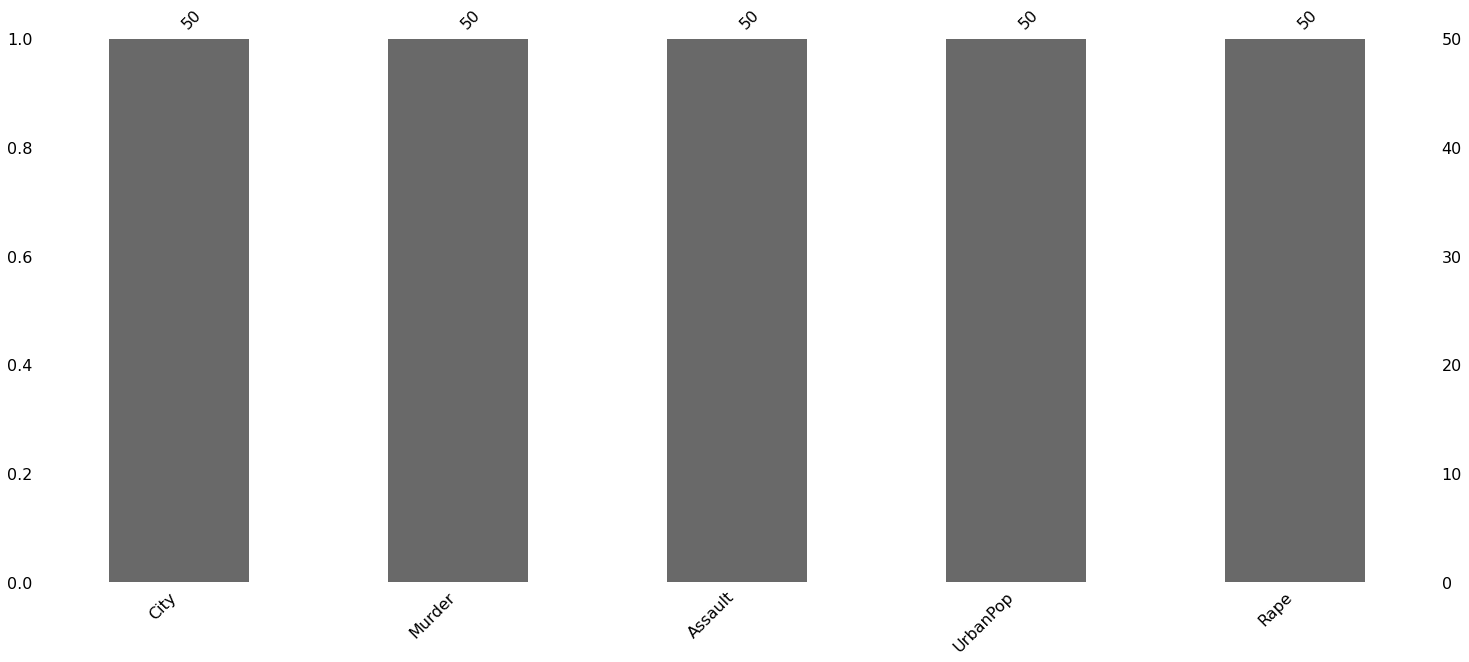

In [32]:
missingno.bar(arrests)

As revealed above, no null or empty values are present in the dataset. Therefore, excessive cleaning or imputation will be required for the dataset.

### US Arrests Statistics

In [27]:
arrests.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [30]:
arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [87]:
# Grouping the number of murder cases per 100 000 residents based on the city 
city_murders = arrests.groupby("Murder")["City"].sum()
city_murders.sort_values()
city_murders

Murder
0.8           North Dakota
2.1     MaineNew Hampshire
2.2            IowaVermont
2.6         IdahoWisconsin
2.7              Minnesota
3.2                   Utah
3.3            Connecticut
3.4           Rhode Island
3.8           South Dakota
4.0             Washington
4.3               Nebraska
4.4          Massachusetts
4.9                 Oregon
5.3                 Hawaii
5.7          West Virginia
5.9               Delaware
6.0          KansasMontana
6.3           Pennsylvania
6.6               Oklahoma
6.8                Wyoming
7.2                Indiana
7.3                   Ohio
7.4             New Jersey
7.9               Colorado
8.1                Arizona
8.5               Virginia
8.8               Arkansas
9.0     CaliforniaMissouri
9.7               Kentucky
10.0                Alaska
10.4              Illinois
11.1              New York
11.3              Maryland
11.4            New Mexico
12.1              Michigan
12.2                Nevada
12.7                 

In [91]:
# Grouping the percentages
arrests.groupby("City")["UrbanPop"].sum().sort_values(ascending = False)

City
California        91
New Jersey        89
Rhode Island      87
New York          86
Massachusetts     85
Hawaii            83
Illinois          83
Nevada            81
Texas             80
Arizona           80
Florida           80
Utah              80
Colorado          78
Connecticut       77
Ohio              75
Michigan          74
Washington        73
Delaware          72
Pennsylvania      72
New Mexico        70
Missouri          70
Oklahoma          68
Maryland          67
Oregon            67
Louisiana         66
Minnesota         66
Kansas            66
Wisconsin         66
Indiana           65
Virginia          63
Nebraska          62
Georgia           60
Wyoming           60
Tennessee         59
Alabama           58
Iowa              57
New Hampshire     56
Idaho             54
Montana           53
Kentucky          52
Maine             51
Arkansas          50
Alaska            48
South Carolina    48
North Carolina    45
South Dakota      45
North Dakota      44
Mississi

In [88]:
arrests.groupby("City")["Rape"].sum().sort_values()

City
North Dakota       7.3
Maine              7.8
Rhode Island       8.3
West Virginia      9.3
New Hampshire      9.5
Wisconsin         10.8
Connecticut       11.1
Vermont           11.2
Iowa              11.3
South Dakota      12.8
Idaho             14.2
Minnesota         14.9
Pennsylvania      14.9
Wyoming           15.6
Delaware          15.8
North Carolina    16.1
Kentucky          16.3
Massachusetts     16.3
Montana           16.4
Nebraska          16.5
Mississippi       17.1
Kansas            18.0
New Jersey        18.8
Arkansas          19.5
Oklahoma          20.0
Hawaii            20.2
Virginia          20.7
Indiana           21.0
Alabama           21.2
Ohio              21.4
Louisiana         22.2
South Carolina    22.5
Utah              22.9
Illinois          24.0
Texas             25.5
Georgia           25.8
New York          26.1
Washington        26.2
Tennessee         26.9
Maryland          27.8
Missouri          28.2
Oregon            29.3
Arizona           31.0
Florid

In [89]:
arrests.groupby("City")["Assault"].sum().sort_values()

City
North Dakota       45
Hawaii             46
Vermont            48
Wisconsin          53
Iowa               56
New Hampshire      57
Minnesota          72
West Virginia      81
Maine              83
South Dakota       86
Nebraska          102
Pennsylvania      106
Montana           109
Kentucky          109
Connecticut       110
Indiana           113
Kansas            115
Idaho             120
Ohio              120
Utah              120
Washington        145
Massachusetts     149
Oklahoma          151
Virginia          156
Oregon            159
New Jersey        159
Wyoming           161
Rhode Island      174
Missouri          178
Tennessee         188
Arkansas          190
Texas             201
Colorado          204
Georgia           211
Alabama           236
Delaware          238
Louisiana         249
Illinois          249
Nevada            252
New York          254
Michigan          255
Mississippi       259
Alaska            263
California        276
South Carolina    279
New M

In [117]:
# The highest crime rate city
arrests.max()

City        Wyoming
Murder         17.4
Assault         337
UrbanPop         91
Rape           46.0
dtype: object

In [118]:
# The lowest crime rate city
arrests.min()

City        Alabama
Murder          0.8
Assault          45
UrbanPop         32
Rape            7.3
dtype: object

Shockingly, as revealed above, Wyoming is the city that appears to be the most dangerous for residents. This is suprising considering 91% of the population is situated in an urban area. This may be because the policing system in Wyoming is very good as a large majority of crimes are reported. Alternatively, the policing system may be subpar allowing for more of these crimes to be committed.

Conversely, Alabama may be considered the safest per 100 000 residents of the collected statistics. It is important to note however, that the statistics may be skewed in favour of Alabama being the safest due to the lack of reporting of crimes. As mentioned above in the case of Wyoming, many cases being reported suggests that an increased level of police activity takes place in the city, therefore, making it safer overall. Alabama however, may not have the same level of policing therefore allowing for a lower number in reported crimes. The statistics suggest that Alabama is the safest however. 

### Identifying and plotting the correlations between the variables

In [34]:
arrest_correlations = arrests.corr()
arrest_correlations

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


<AxesSubplot:>

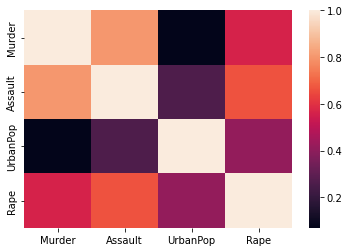

In [35]:
sns.heatmap(arrest_correlations)

## Correlation Analysis

Based on the return above, Murder and Assault have the strongest correlation which suggests that assaults often lead to murder. Assault may be targeted or be at random. It is often the case that an incident of assault becomes so severe, the victim succumbs to the injuries or is rather, murdered during the act of the crime. Without additional information, the assumption arrives that most murder cases are assault-related incidents that lead to murder. Whether through use of a firearm, object or by hand, many assault victims do not survive the incidents. The same applies to Rape cases. Rape is deemed a form of assault which complies with the strong correlation that rape cases have to the assault cases. 

An increase in murder rates results in a decrease in the urban population. This complies with reasonable logic. As the more individuals murdered, the lower the number of the urban population.

An estimated 50% of rape cases often lead to murders. This statistic suggests that rape victims will likely be murdered contributing to the number of murder cases.

An interesting find however, reveals itself in the correlation between the number of rape cases and the size of the urban population. A pure assumption leads one to believe that many rape-related incidents would lead to a growth in population as a result of forced pregnancies. The dataset tells a different story however. This may be because rape cases are not laregly limited to the female population and may indicate that many men and young children, (individuals that cannot fall pregnant), fall victim to rape. Of which is very unfortunate for all parties.

An alternative reason for the lowered correlation between rape-related incidents and the urban population may be that pregnancy preventative measures are very good and accessible to the larger population. Fewer rape victims may fall pregnant, provided the victims are assessed and assisted by a medical professional, of which is a good indication of the level of medical assistance and advancements in the medical sphere in the United States.

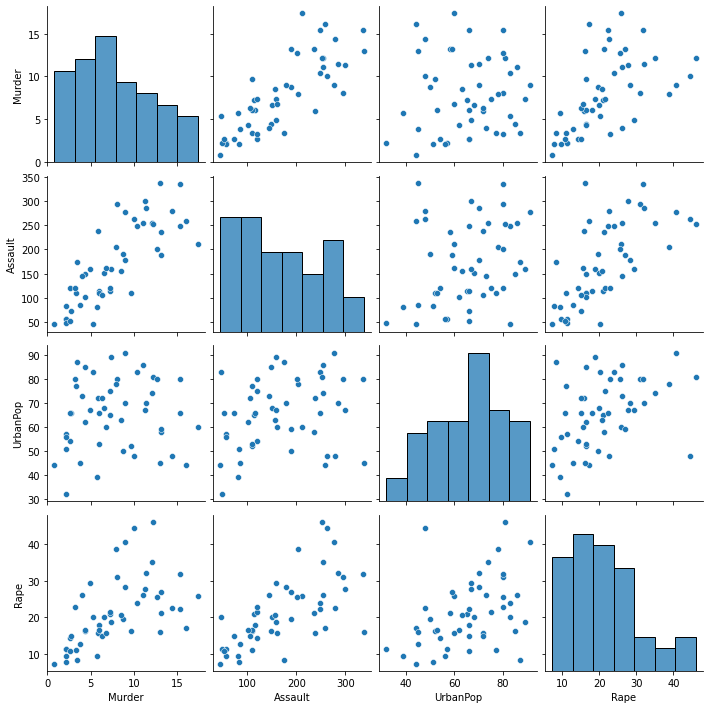

In [52]:
sns.pairplot(arrests)

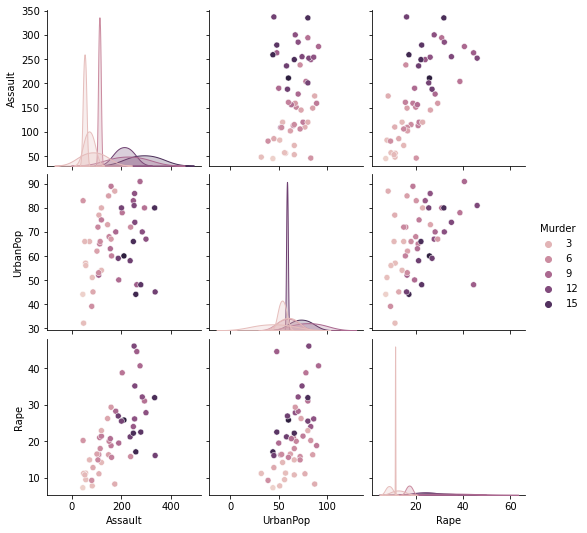

In [46]:
# Visualising the effects that other variables have on murder cases
sns.pairplot(arrests, hue = "Murder")

## Clustering

In [181]:
# Imports for data clustering
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Initialising the principle component analysis and standard scaler objects
pca = PCA(n_components = 2)
scaler = StandardScaler()

In [105]:
arrests.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [147]:
# Assigning x to the murder, assault and rape rates and y to the urban population
x = arrests.iloc[:, [1, 2, 4]].values.reshape(-1, 3)
y = arrests.iloc[:, 3].values

### KMeans Clustering

In [148]:
# Murder rate is the selected feature for the clustering analysis
kmeans = KMeans(n_clusters = 3, random_state = 0, init = "k-means++")
kmeans.fit(x)

KMeans(n_clusters=3, random_state=0)

#### Predictions

In [151]:
y_kmeans = kmeans.fit_predict(x)
y_kmeans.reshape(1, -1)

array([[1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
        0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
        0, 2, 2, 0, 0, 2]])

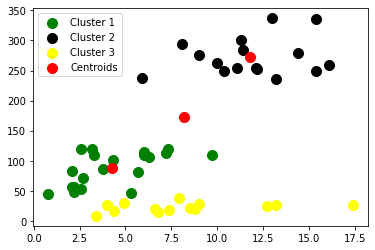

In [156]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = "green", label = "Cluster 1")
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = "black", label = "Cluster 2")
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 2], s = 100, c = "yellow", label = "Cluster 3")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = "red", label = "Centroids")
plt.legend()
plt.show()

Having selected 3 clusters, the scatter plot above reveals that 2 clusters are the most optimal number for the clustering technique.

Analysing the clusters reveals that most, if not many, assault related crimes lead to murders. A very strong relationship (correlation) exists between the two. 

### Hierarchical Clustering

In [157]:
# Scaling the data
x = scaler.fit_transform(x)
x

array([[ 1.25517927,  0.79078716, -0.00345116],
       [ 0.51301858,  1.11805959,  2.50942392],
       [ 0.07236067,  1.49381682,  1.05346626],
       [ 0.23470832,  0.23321191, -0.18679398],
       [ 0.28109336,  1.2756352 ,  2.08881393],
       [ 0.02597562,  0.40290872,  1.88390137],
       [-1.04088037, -0.73648418, -1.09272319],
       [-0.43787481,  0.81502956, -0.58583422],
       [ 1.76541475,  1.99078607,  1.1505301 ],
       [ 2.22926518,  0.48775713,  0.49265293],
       [-0.57702994, -1.51224105, -0.11129987],
       [-1.20322802, -0.61527217, -0.75839217],
       [ 0.60578867,  0.94836277,  0.29852525],
       [-0.13637203, -0.70012057, -0.0250209 ],
       [-1.29599811, -1.39102904, -1.07115345],
       [-0.41468229, -0.67587817, -0.34856705],
       [ 0.44344101, -0.74860538, -0.53190987],
       [ 1.76541475,  0.94836277,  0.10439756],
       [-1.31919063, -1.06375661, -1.44862395],
       [ 0.81452136,  1.56654403,  0.70835037],
       [-0.78576263, -0.26375734, -0.531

### Dendrograms

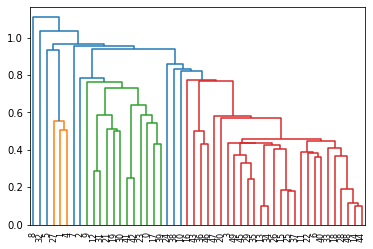

<Figure size 1152x576 with 0 Axes>

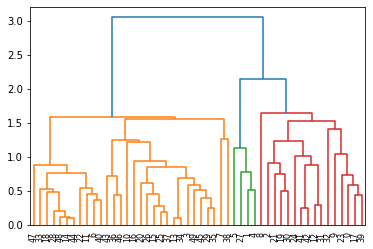

<Figure size 1152x576 with 0 Axes>

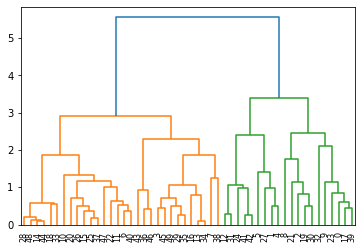

<Figure size 1152x576 with 0 Axes>

In [159]:
links_single = linkage(x, "single")

dendrogram(links_single)
plt.figure(figsize = (16, 8))
plt.show()

links_average = linkage(x, "average")

dendrogram(links_average)
plt.figure(figsize = (16, 8))
plt.show()

links_complete = linkage(x, "complete")

dendrogram(links_complete)
plt.figure(figsize = (16, 8))
plt.show()

The dendrograms above hint towards assigning 2-3 clusters for the clustering techniques. However, having visualised the clusters, it is clear that 2 clusters will suffice.

In [160]:
# k functioning as the number of clusters
k = 2

In [172]:
# Generating the predictions made by the Agglomerative Clustering method
clusters = AgglomerativeClustering(n_clusters = k, affinity = "euclidean", linkage = "single")
clusters.fit_predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

C:\Users\richj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

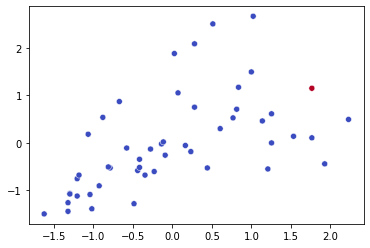

In [173]:
sns.scatterplot(x[:, 0], x[:, 2], c = clusters.labels_, cmap = "coolwarm")

### Principle Component Analysis

In [174]:
arrests.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [175]:
# Fitting the data to PCA and returning the first 7 results
components = pca.fit_transform(x)
components[:7]

array([[ 1.21019086,  0.84227709],
       [ 2.33218699, -1.5394343 ],
       [ 1.51859328, -0.50336289],
       [ 0.17777619,  0.32802946],
       [ 2.06600019, -1.28549694],
       [ 1.27624014, -1.44088797],
       [-1.64358347,  0.18041703]])

C:\Users\richj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

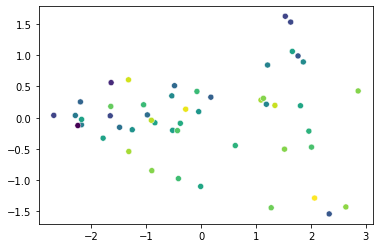

In [183]:
sns.scatterplot(components[:, 0], components[:, 1], c = y)

As revealed above in the data exploration section of the task, the percentage of the population does not have a big enough effect on the rate of crime. The scatter plot above emphasises that presumption. This however is an assumption based on a small dataset that is not a representative of the whole situation. The higher the population, the higher the crime rate because the likelyhood of a crime occuring increases exponentially the more people there are in the city to commit the crime. The data suggests otherwise. That is not the case however. 